# Hausse du niveau de la mer due à la fonte des glaciers
Données téléchargées à https://zenodo.org/records/6382554 

In [1]:
import h5py
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
nom_fichier = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp119/glaciers_ssp119_medium_confidence_values.nc"

In [3]:
from netCDF4 import Dataset

# Chemin vers le fichier NetCDF

with Dataset(nom_fichier, "r") as fichier_nc:
    # Afficher les informations détaillées sur chaque variable
    print("\nInformations détaillées sur les variables du fichier :")
    for nom_variable in fichier_nc.variables:
        variable = fichier_nc.variables[nom_variable]
        print("\nNom de la variable :", nom_variable)
        print("Dimensions de la variable :", variable.dimensions)
        print("Attributs de la variable :")
        for attribut in variable.ncattrs():
            print(f"\t{attribut} :", getattr(variable, attribut))


Informations détaillées sur les variables du fichier :

Nom de la variable : sea_level_change
Dimensions de la variable : ('quantiles', 'years', 'locations')
Attributs de la variable :
	_FillValue : -32768
	units : mm
	scale_factor : 1.0

Nom de la variable : lat
Dimensions de la variable : ('locations',)
Attributs de la variable :
	_FillValue : nan

Nom de la variable : lon
Dimensions de la variable : ('locations',)
Attributs de la variable :
	_FillValue : nan

Nom de la variable : years
Dimensions de la variable : ('years',)
Attributs de la variable :

Nom de la variable : locations
Dimensions de la variable : ('locations',)
Attributs de la variable :

Nom de la variable : quantiles
Dimensions de la variable : ('quantiles',)
Attributs de la variable :
	_FillValue : nan


In [4]:
ds = Dataset(nom_fichier, "r")

In [5]:
ds["sea_level_change"].ncattrs()

['_FillValue', 'units', 'scale_factor']

In [6]:
ds["sea_level_change"][10]

masked_array(
  data=[[10],
        [18],
        [18],
        [25],
        [24],
        [36],
        [38],
        [44],
        [48],
        [49],
        [51],
        [52],
        [52],
        [53]],
  mask=False,
  fill_value=999999,
  dtype=int16)

# Plot hausse niveau de la mer global

In [7]:
ssp126 = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp119/glaciers_ssp119_medium_confidence_values.nc"
ssp370 = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp370/glaciers_ssp370_medium_confidence_values.nc"
ssp585 = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp585/glaciers_ssp585_medium_confidence_values.nc"

data_ssp126 = xr.open_dataset(ssp126)
data_ssp370 = xr.open_dataset(ssp370)
data_ssp585 = xr.open_dataset(ssp585)


# Extraire les données pertinentes
sea_level_change_ssp126 = data_ssp126['sea_level_change'].values.squeeze()  # squeeze to remove the singleton dimension
sea_level_change_ssp370 = data_ssp370['sea_level_change'].values.squeeze()
sea_level_change_ssp585 = data_ssp585['sea_level_change'].values.squeeze()

years = data_ssp126['years'].values.squeeze()  # squeeze to remove the singleton dimension
quantiles = np.arange(0.0, 1.01, 0.01)

# Poids de chaque quantile
weights = 0.01  # incrément de 0.01

# Calculer la moyenne pondérée du niveau de la mer pour chaque année
sea_level_change_mean_ssp126 = np.sum(sea_level_change_ssp126 * weights, axis=0) * 100  # Multipliez par 100 pour obtenir le pourcentage
sea_level_change_mean_ssp370 = np.sum(sea_level_change_ssp370 * weights, axis=0) * 100  # Multipliez par 100 pour obtenir le pourcentage
sea_level_change_mean_ssp585 = np.sum(sea_level_change_ssp585 * weights, axis=0) * 100  # Multipliez par 100 pour obtenir le pourcentage

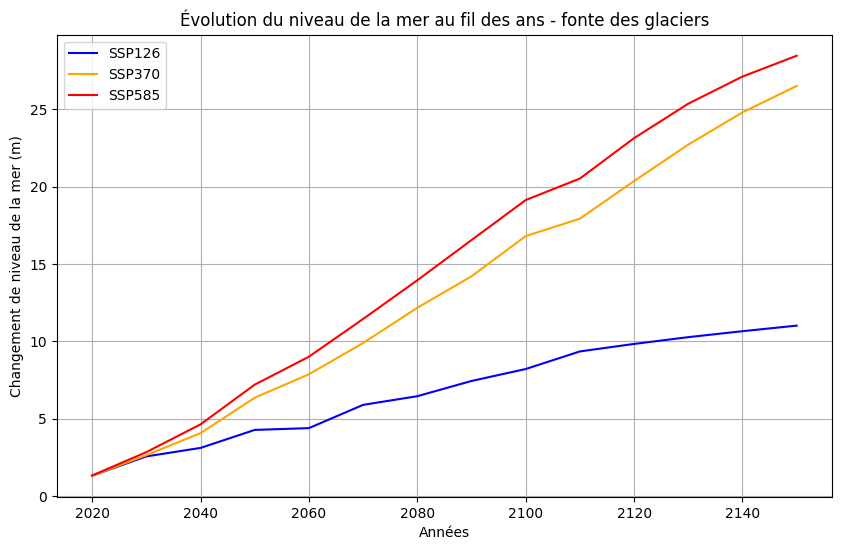

In [8]:
# Tracer la courbe de l'évolution du niveau de la mer au fil des ans
plt.figure(figsize=(10, 6))
plt.plot(years, sea_level_change_mean_ssp126/1000, color='blue', label='SSP126')
plt.plot(years, sea_level_change_mean_ssp370/1000, color='orange', label='SSP370')
plt.plot(years, sea_level_change_mean_ssp585/1000, color='red', label='SSP585')
plt.xlabel('Années')
plt.ylabel('Changement de niveau de la mer (m)')
plt.title('Évolution du niveau de la mer au fil des ans - fonte des glaciers')
plt.grid(True)
plt.legend()
plt.show()

# Carte interactive

Données délévation des terrains téléchargées à https://datacatalog.worldbank.org/search/dataset/0037910

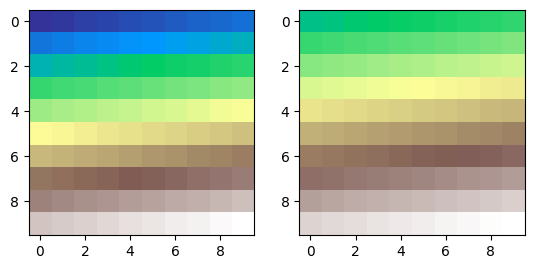

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('terrain')
new_cmap = truncate_colormap(cmap, 0.23, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

https://ims.cr.usgs.gov/browse/gtopo30/gt30w020n90.jpg

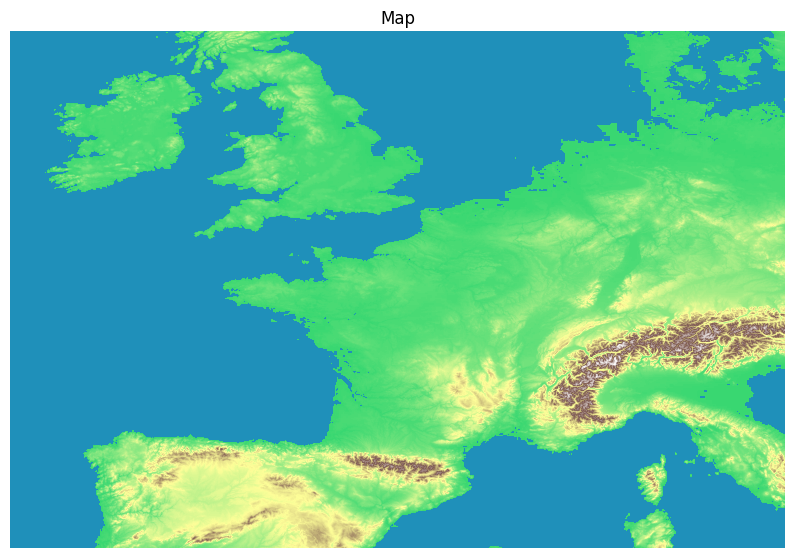

In [10]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def map(path, altitude_threshold=2):
    img = Image.open(path)
    img = img.crop((1000, 4000, 4000, 6000))
    img = np.asarray(img)
            
    cmap = new_cmap(np.linspace(0.1, 1, 256))
    blue = np.array([32/256, 145/256, 187/256, 1])
    lightblue  =   np.array([33/256, 163/256, 209/256, 1])
    cmap[:1, :] = blue
    cmap[1:altitude_threshold, :] = lightblue
    cmap = ListedColormap(cmap)
    
    # Affichage de la carte avec les couleurs appropriées
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Affichage des altitudes entre 0 et le seuil en rouge
    ax.imshow(img, cmap=cmap, extent=(0, img.shape[1], 0, img.shape[0]))
        
    ax.set_aspect('equal')
    ax.axis('off')  # Supprimer les axes et la grille
    ax.set_title('Map')
    ax.margins(0.1, 0.1)  # Ajouter des marges pour éviter le rognage lors du zoom
    plt.xlim(0, img.shape[1])
    plt.ylim(0, img.shape[0])
    
    plt.savefig('map.jpg')
    plt.show()
    

file_path = "gt30w020n90.jpg"
map(file_path, altitude_threshold=0)

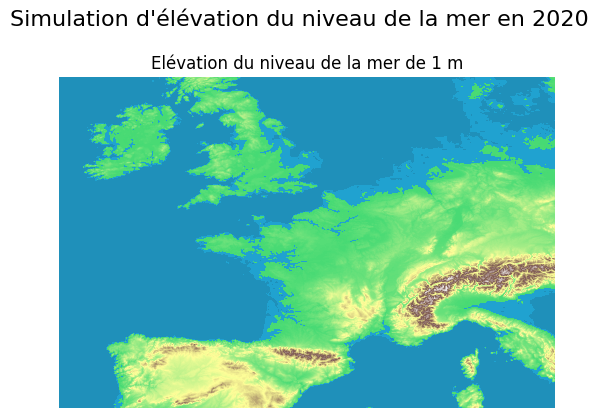

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import ListedColormap
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Définir votre fonction map (je suppose qu'elle prend en entrée un chemin de fichier et un seuil d'altitude)
def map(cmap, altitude_threshold=0):
    altitude_threshold = int(altitude_threshold//2)       
    cmap = cmap
    blue = np.array([32/256, 145/256, 187/256, 1])
    lightblue = np.array([33/256, 163/256, 209/256, 1])
    cmap[:1, :] = blue
    cmap[1:altitude_threshold, :] = lightblue
    cmap = ListedColormap(cmap)

    return cmap

def update(frame, fig):
    ax.clear()  # Nettoyer l'axe pour la mise à jour
    year = 2020 + frame * 10  # Année correspondante à la trame actuelle
    altitude_threshold = sea_level_change_mean_ssp126[frame]//1000  # Seuil d'altitude pour cette année  # Chemin de votre fichier
    cmap_year = map(cmap, altitude_threshold)  # Générer l'image pour cette année et ce seuil
    im.set_array(img)  # Mettre à jour l'image avec la nouvelle carte
    plt.suptitle(f"Simulation d'élévation du niveau de la mer en {year}", fontsize=16)   
    ax.set_title(f"Elévation du niveau de la mer de {int(altitude_threshold)} m")  # Mettre à jour le titre de l'axe 
    ax.imshow(img, cmap=cmap_year, extent=(0, img.shape[1], 0, img.shape[0]))
    plt.axis('off')
    return [im]  # Retourner une liste contenant l'objet image

path = "gt30w020n90.jpg"
img = Image.open(path)
img = img.crop((1000, 4000, 4000, 6000))
img = np.asarray(img)

cmap = plt.get_cmap('terrain')
cmap = truncate_colormap(cmap, 0.23, 1)
cmap = cmap(np.linspace(0.1, 1, 256))

# Créer la figure
fig, ax = plt.subplots()
# Initialisez l'image avec une image vide (vous pouvez remplacer cela par une image réelle si nécessaire)
im = ax.imshow(img, map(cmap, 0))

# Nombre total de trames basé sur la longueur de votre ndarray sea_level_change_mean_ssp126
num_frames = len(sea_level_change_mean_ssp126)

# Créez l'animation avec FuncAnimation
ani = FuncAnimation(fig, update, frames=num_frames, fargs=(fig,))

# Générer le code HTML de l'animation
animation_html = ani.to_jshtml();

# Affichage de l'animation
HTML(ani.to_jshtml())

# Générer le code HTML de l'animation
animation_html = ani.to_jshtml();

# # Écrire le code HTML dans un fichier
# with open("niveau_mer.html", "w") as html_file:
#     html_file.write(animation_html);

In [13]:
with open("niveau_mer.html", "w") as html_file:
    html_file.write(animation_html);

# Scénatios SSP

In [12]:
ssp126 = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp119/glaciers_ssp119_medium_confidence_values.nc"
ssp370 = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp370/glaciers_ssp370_medium_confidence_values.nc"
ssp585 = "ar6/ar6/global/confidence_output_files/medium_confidence/ssp585/glaciers_ssp585_medium_confidence_values.nc"

data_ssp126 = xr.open_dataset(ssp126)
data_ssp370 = xr.open_dataset(ssp370)
data_ssp585 = xr.open_dataset(ssp585)


# Extraire les données pertinentes
sea_level_change_ssp126 = data_ssp126['sea_level_change'].values.squeeze()  # squeeze to remove the singleton dimension
sea_level_change_ssp370 = data_ssp370['sea_level_change'].values.squeeze()
sea_level_change_ssp585 = data_ssp585['sea_level_change'].values.squeeze()

years = data_ssp126['years'].values.squeeze()  # squeeze to remove the singleton dimension
quantiles = np.arange(0.0, 1.01, 0.01)

# Poids de chaque quantile
weights = 0.01  # incrément de 0.01

# Calculer la moyenne pondérée du niveau de la mer pour chaque année
sea_level_change_mean_ssp126 = np.sum(sea_level_change_ssp126 * weights, axis=0) * 100  # Multipliez par 100 pour obtenir le pourcentage
sea_level_change_mean_ssp370 = np.sum(sea_level_change_ssp370 * weights, axis=0) * 100  # Multipliez par 100 pour obtenir le pourcentage
sea_level_change_mean_ssp585 = np.sum(sea_level_change_ssp585 * weights, axis=0) * 100  # Multipliez par 100 pour obtenir le pourcentage